<a href="https://colab.research.google.com/drive/1vmyh_Exwx9Uc4xHqhLdWs0FGUETwDSUs#scrollTo=64F8dITYdjKL" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data: Air-quality-dataset** 📄 🔥
- **Nama:** Maulana Al Iqbal Widodo
- **Email:** m268d4ky3129@bangkit.academy
- **ID Dicoding:** abstrakx_123

Link dataset : https://drive.google.com/uc?id=1UjJJ1yboo9gFAU0rNgCSRxTsjqHe6gd3

Data yang akan digunakan :
1. PRSA_Data_Aotizhongxin_20130301-20170228.csv
2. PRSA_Data_Guanyuan_20130301-20170228.csv
3. PRSA_Data_Shunyi_20130301-20170228.csv
4. PRSA_Data_Wanshouxigong_20130301-20170228.csv

Deskripsi :

Dataset ini memuat rincian dari data kualitas air pada wilayah china dengan rentang waktu (01-Maret-2013) - (28-Februari-2017), Parameter kolom dalam data ini memuat tentang :
1. **Datetime**: Tanggal dan jam pengambilan sampel.
2. **PM2.5**: Partikel Matter 2.5, merupakan partikel udara dengan diameter kurang dari 2.5 mikrometer.
3. **PM10**: Partikel Matter 10, merupakan partikel udara dengan diameter kurang dari 10 mikrometer.
4. **SO2**: Dioksida belerang (SO2), merupakan gas beracun yang dihasilkan dari pembakaran bahan bakar fosil, seperti batu bara dan minyak bumi.
5. **NO2**: Dioksida nitrogen (NO2), merupakan gas yang juga dihasilkan dari pembakaran bahan bakar.
6. **CO**: Karbon monoksida (CO), merupakan gas tak berwarna dan tidak berbau yang dihasilkan dari pembakaran bahan organik.
7. **O3**: Ozon (O3), adalah gas beracun yang terbentuk oleh reaksi kimia antara oksigen dan polutan organik yang terjadi di hadapan sinar matahari.
8. **TEMP**: Suhu udara pada waktu pengukuran.
9. **PRES**: Tekanan udara pada waktu pengukuran.
10. **DEWP**: Titik embun, yaitu suhu di mana uap air di udara akan mengembun menjadi embun.
11. **RAIN**: Jumlah hujan pada periode waktu tertentu.
12. **wd**: Arah angin pada waktu pengukuran.
13. **WSPM**: Kecepatan angin pada waktu pengukuran.
14. **station**: Nama stasiun pengukuran.

## **Menentukan Pertanyaan Bisnis :**

* Dari ke-empat data air yang digunakan tersebut, wilayah mana yang memiliki kualitas air tertinggi untuk bulan maret.
* Bagaimana pengaruh curah hujan terhadap kualitas air berdasarkan data tersebut.

## **Import Semua Packages/Library yang Digunakan**

In [1]:
# Melakukan import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

Merupakan proses preprocessing data yang bertujuan untuk menyiapkan data supaya dapat dilakukan analisis data. Proses ini terdiri dari 3 kegiatan yaitu :    
* Gathering data, proses pengumpulan data yang akan dianalisis
* Assesing data, proses penilaian struktur data dan mengidentifikasi permasalahan tergadap data yang sudah didapatkan.
* Cleaning data, proses membersihkan data berdasarkan permasalahan yang kita temukan saat assesing data.

### **Gathering Data**

Algoritma :    
1. Mendownload data dari Google Drive dengan terminal linux gdown.
2. Melakukan ekstraksi file zip lalu melihat semua filenya.

In [2]:
# Mendownload zip dataset dari google drive
!gdown 1UjJJ1yboo9gFAU0rNgCSRxTsjqHe6gd3

Downloading...
From: https://drive.google.com/uc?id=1UjJJ1yboo9gFAU0rNgCSRxTsjqHe6gd3
To: /content/Air-quality-dataset.zip
100% 7.96M/7.96M [00:00<00:00, 41.6MB/s]


In [3]:
# Melakukan ekstrak data yang sudah didownload
!unzip /content/Air-quality-dataset.zip

Archive:  /content/Air-quality-dataset.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-201702

In [4]:
# Menyimpan direktori dalam variabel data_dir dan station
data_dir = "/content/PRSA_Data_20130301-20170228/"
stations = ['Aotizhongxin', 'Guanyuan', 'Shunyi', 'Wanshouxigong']

In [5]:
# Mengecek file yang dibutuhkan dalam direktori data_dir
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir) if any(station in filename for station in stations)]
filenames

['/content/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 '/content/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',
 '/content/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv',
 '/content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv']

In [6]:
# Membuat fungsi untuk membaca file csv kita dan hanya mengambil data dengan nama stasiun tertentu
def get_data(filename, station):
  """
  Membaca filename dan mereturn sebuah objek dataframe sesuai nama station yang diinginkan
  """
  data = None
  for i in filename:
      if station in i:
          try:
              data = pd.read_csv(i)
              break
          except Exception as e:
              print(f"Error membaca file {i}: {e}")
  if data is None:
      raise ValueError(f"Tidak ada data yang ditemukan untuk station: {station}")
  return data

In [7]:
# Menampilkan dataframe untuk station Aotizhongxin
aotizhongxin_data = get_data(filenames, "Aotizhongxin")
aotizhongxin_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [8]:
# Menampilkan dataframe untuk station Guanyuan
guanyuan_data = get_data(filenames, "Guanyuan")
guanyuan_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [9]:
# Menampilkan dataframe untuk station Shunyi
shunyi_data = get_data(filenames, "Shunyi")
shunyi_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [10]:
# Menampilkan dataframe untuk station Wanshouxigong
wanshouxigong_data = get_data(filenames, "Wanshouxigong")
wanshouxigong_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [12]:
# Akan menampilkan error, data tidak ditemukan untuk stasiun yang tidak dibutuhkan (misal : Wanliu)
#wanliu_data = get_data(filenames, "Wanliu")

ValueError: Tidak ada data yang ditemukan untuk station: Wanliu

### **Assessing Data**

Algoritma :    
1. Melihat keseluruhan informasi dan karakteristik dataframe dengan menggunakan `df.info()`.
2. Melihat kolom mana yang memiliki data NaN / Missing value yang perlu kita bersihkan nanti dengan `df.isna().sum()`.
3. Melihat data duplikasi dengan method `df.duplicated().sum()`.
4. Melihat data yang memiliki nilai invalid dengan method `df.describe()`.

Melakukan assessing data pada dataframe `aotizhongxin_data`

In [13]:
# Melihat karakteristik data
aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
# Melihat missing value pada dataframe
aotizhongxin_data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [15]:
# Melihat apakah ada duplikasi data
print("Data duplicated: ", aotizhongxin_data.duplicated().sum())

Data duplicated:  0


In [16]:
# Melihat apakah dataframe memiliki invalid value
aotizhongxin_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Melakukan assessing data pada dataframe `guanyuan_data`

In [17]:
# Melihat karakteristik data
guanyuan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [18]:
# Melihat missing value pada dataframe
guanyuan_data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [19]:
# Melihat apakah ada duplikasi data
print("Data duplicated: ", guanyuan_data.duplicated().sum())


Data duplicated:  0


In [20]:
# Melihat apakah dataframe memiliki invalid value
guanyuan_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Melakukan assessing data pada dataframe `shunyi_data`

In [21]:
# Melihat karakteristik data
shunyi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [22]:
# Melihat missing value pada dataframe
shunyi_data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [23]:
# Melihat apakah ada duplikasi data
print("Data duplicated: ", shunyi_data.duplicated().sum())

Data duplicated:  0


In [24]:
# Melihat apakah dataframe memiliki invalid value
shunyi_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Melakukan assessing data pada dataframe `Wanshouxigong_data`

In [25]:
# Melihat karakteristik data
wanshouxigong_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
# Melihat missing value pada dataframe
wanshouxigong_data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [27]:
# Melihat apakah ada duplikasi data
print("Data duplicated: ", wanshouxigong_data.duplicated().sum())

Data duplicated:  0


In [28]:
# Melihat apakah dataframe memiliki invalid value
wanshouxigong_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [29]:
# Melihat kolom data yang memiliki nilai NaN > 4 kolom
aotizhongxin_data[aotizhongxin_data.isna().sum(axis=1) > 4]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7882,7883,2014,1,23,10,NaN,NaN,NaN,NaN,NaN,NaN,0.7,1011.9,-12.7,0.0,NE,1.9,Aotizhongxin
7939,7940,2014,1,25,19,NaN,NaN,NaN,NaN,NaN,NaN,2.5,1025.1,-19.5,0.0,NNE,1.4,Aotizhongxin
7940,7941,2014,1,25,20,NaN,NaN,NaN,NaN,NaN,NaN,1.9,1026.0,-20.6,0.0,NE,1.9,Aotizhongxin
7941,7942,2014,1,25,21,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1026.7,-21.0,0.0,NE,1.8,Aotizhongxin
7942,7943,2014,1,25,22,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1027.3,-5.0,0.0,SW,3.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


### **Cleaning Data**

Kesimpulan permasalahan data yang didapat ketika melakukan proses assesing data adalah :    
1. Kolom tanggal dan waktu dipisah dan tidak dijadikan satu dalam kolom datetime.
2. Missing value pada setiap dataframe cukup banyak terutama pada kolom `CO` disetiap dataset.
3. Cukup banyak data pada setiap dataset yang memiliki missing value lebih dari 4 kolom.
4. Setiap data dalam kolom tersebut adalah data tentang parameter lingkungan dan meteorologi yang diukur pada waktu tertentu di berbagai stasiun pengukuran. Sehingga tidak ada hubungan antara kolom satu dan lainnya yang bisa digunakan untuk mengisi missing value.
5. Tidak ada duplikasi dan invalid value pada data.

Solusi data cleaning yang bisa dilakukan adalah :    
1. Dengan melakukan dropping data yang memiliki value NaN menggunakan method `df.dropna()`. Sehingga data yang memiliki missing value dapat langsung terhapus.

 Kelebihannya :    
>* Proses cleaning data sangat cepat.
>* Sangat kecil sekali kemungkinan mempengaruhi hasil pengukuran lanjutan seperti mean, modus, median.
>* Sangat cocok dengan data yang tidak memiliki hubungan antar kolom, tidak seperti data penjualan yang memiliki hubungan antara kolom total yang merupakan perkalian dari kolom harga dan kuantitas.

 Kekurangannya :    
>* Memungkinkan cukup banyak data yang didrop.

2. Karena data tersebut berdasarkan satuan waktu, kita dapat mengisi kolom data yang kosong berdasarkan mean, modus, atau median terhadap data di kolom bulan yang sama dengan data yang kosong.

 Kelebihannya :    
>* Data yang memiliki informasi yang penting dapat kita selamatkan.
>* Cocok untuk data yang hilang pada kolom yang sedikit dan data tersebut masih menyimpan informasi berharga pada kolom lain.

 Kekurangannya :    
>* Cukup lama untuk melakukan pembersihan data dengan cara ini.
>* Terdapat cukup banyak sekali baris data yang kolomnya memiliki missing value > 3 sehingga sangat tidak efisien waktu.
>* Dapat mengubah nilai mean, modus dan median secara signifikan.

3. Dapat melakukannya secara hybrid, yaitu melakukan droping pada data yang memiliki kolom dengan missing value yang banyak, dan mengisi kolom data berdasarkan mean, modus, atau median pada kolom dengan missing value yang sedikit

 Kelebihannya :    
>* Data yang memiliki informasi yang penting dapat kita selamatkan.
>* Sangat kecil sekali kemungkinan mempengaruhi hasil pengukuran lanjutan seperti mean, modus, median.

 Kekurangannya :    
>* Sangat lama dan cukup kompleks untuk melakukan pembersihan data dengan cara ini.

Berdasarkan analisa diatas saya menggunakan metode pertama yaitu dropping data dengan missing value sehingga lebih cepat, mudah dan efisien. hehehehe... :)



Cleaning data `aotizhongxin_data`

In [30]:
# Melakukan drop data yang memiliki missing value
new_aotizhongxin_df = aotizhongxin_data.dropna()
new_aotizhongxin_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [31]:
# Melihat missing value pada data
new_aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [32]:
# Membandingkan berapa banyak data yang didrop
len(aotizhongxin_data), len(new_aotizhongxin_df)

(35064, 31815)

In [33]:
# Menambahkan kolom datetime yang menggabungkan kolom year, day, month, dan hour
new_aotizhongxin_df['datetime'] = pd.to_datetime(new_aotizhongxin_df[['year', 'month', 'day']])
new_aotizhongxin_df['datetime'] += pd.to_timedelta(new_aotizhongxin_df['hour'], unit="h")

<ipython-input-33-56a4fc7beacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aotizhongxin_df['datetime'] = pd.to_datetime(new_aotizhongxin_df[['year', 'month', 'day']])
<ipython-input-33-56a4fc7beacb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aotizhongxin_df['datetime'] += pd.to_timedelta(new_aotizhongxin_df['hour'], unit="h")


In [34]:
new_aotizhongxin_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28 20:00:00
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28 21:00:00
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28 22:00:00


Cleaning data `guanyuan_data`

In [35]:
# Melakukan drop data yang memiliki missing value
new_guanyuan_df = guanyuan_data.dropna()
new_guanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [36]:
# Melihat missing value pada data
new_guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [37]:
# Membandingkan berapa banyak data yang didrop
len(guanyuan_data), len(new_guanyuan_df)

(35064, 32263)

In [38]:
# Menambahkan kolom datetime yang menggabungkan kolom year, day, month, dan hour
new_guanyuan_df['datetime'] = pd.to_datetime(new_guanyuan_df[['year', 'month', 'day']])
new_guanyuan_df['datetime'] += pd.to_timedelta(new_guanyuan_df['hour'], unit="h")

<ipython-input-38-cfcc48ef3f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_guanyuan_df['datetime'] = pd.to_datetime(new_guanyuan_df[['year', 'month', 'day']])
<ipython-input-38-cfcc48ef3f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_guanyuan_df['datetime'] += pd.to_timedelta(new_guanyuan_df['hour'], unit="h")


In [39]:
new_guanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan,2017-02-28 22:00:00


Cleaning data `shunyi_data`

In [40]:
# Melakukan drop data yang memiliki missing value
new_shunyi_df = shunyi_data.dropna()
new_shunyi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,Shunyi
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [41]:
# Melihat missing value pada data
new_shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [42]:
# Membandingkan berapa banyak data yang didrop
len(shunyi_data), len(new_shunyi_df)

(35064, 30194)

In [43]:
# Menambahkan kolom datetime yang menggabungkan kolom year, day, month, dan hour
new_shunyi_df['datetime'] = pd.to_datetime(new_shunyi_df[['year', 'month', 'day']])
new_shunyi_df['datetime'] += pd.to_timedelta(new_shunyi_df['hour'], unit="h")

<ipython-input-43-8aa3d1555768>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shunyi_df['datetime'] = pd.to_datetime(new_shunyi_df[['year', 'month', 'day']])
<ipython-input-43-8aa3d1555768>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shunyi_df['datetime'] += pd.to_timedelta(new_shunyi_df['hour'], unit="h")


In [44]:
new_shunyi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01 00:00:00
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01 01:00:00
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi,2013-03-01 05:00:00
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,Shunyi,2013-03-01 06:00:00
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,Shunyi,2013-03-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi,2017-02-28 19:00:00
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi,2017-02-28 20:00:00
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi,2017-02-28 21:00:00
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi,2017-02-28 22:00:00


Cleaning data `wanshouxigong_data`

In [45]:
# Melakukan drop data yang memiliki missing value
new_wanshouxigong_df = wanshouxigong_data.dropna()
new_wanshouxigong_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
5,6,2013,3,1,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong
6,7,2013,3,1,6,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,NE,2.3,Wanshouxigong
7,8,2013,3,1,7,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,NNE,2.0,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [46]:
# Melihat missing value pada data
new_wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [47]:
# Membandingkan berapa banyak data yang didrop
len(wanshouxigong_data), len(new_wanshouxigong_df)

(35064, 32768)

In [48]:
# Menambahkan kolom datetime yang menggabungkan kolom year, day, month, dan hour
new_wanshouxigong_df['datetime'] = pd.to_datetime(new_wanshouxigong_df[['year', 'month', 'day']])
new_wanshouxigong_df['datetime'] += pd.to_timedelta(new_wanshouxigong_df['hour'], unit="h")

<ipython-input-48-d4d18ab8f56b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_wanshouxigong_df['datetime'] = pd.to_datetime(new_wanshouxigong_df[['year', 'month', 'day']])
<ipython-input-48-d4d18ab8f56b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_wanshouxigong_df['datetime'] += pd.to_timedelta(new_wanshouxigong_df['hour'], unit="h")


In [49]:
new_wanshouxigong_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,2013-03-01 00:00:00
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,2013-03-01 01:00:00
5,6,2013,3,1,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong,2013-03-01 05:00:00
6,7,2013,3,1,6,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,NE,2.3,Wanshouxigong,2013-03-01 06:00:00
7,8,2013,3,1,7,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,NNE,2.0,Wanshouxigong,2013-03-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


## **Exploratory Data Analysis (EDA)**

Merupakan proses untuk mengeksplorasi dan mengenal sebuah data, tahapan yang dilakukan untuk proses ini adalah :    
* Mendefinisikan berbagai pertanyaan.
* Menggali data guna menemukan insight menarik dari sebuah data
* Memvalidasi insight yang diperoleh

**Note:** Karena semua data memiliki kolom dan karakteristik data yang sama sehingga proses exploratory data tidak terlalu membutuhkan pemahaman mendalam terhadap semua data, sebenarnya cukup menganalisis 1 data saja untuk memahami pergerakan data tersebut.

**Explore** `new_aotizhongxin_df`

In [50]:
new_aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
34367,34368,2017,1,30,23,70.0,82.0,42.0,41.0,900.0,76.0,-0.4,1028.3,-26.4,0.0,SW,3.3,Aotizhongxin,2017-01-30 23:00:00
15189,15190,2014,11,23,21,158.0,207.0,13.0,129.0,2600.0,2.0,1.0,1022.5,-0.2,0.0,WNW,0.9,Aotizhongxin,2014-11-23 21:00:00
25297,25298,2016,1,19,1,19.0,26.0,4.0,47.0,900.0,16.0,-12.0,1025.6,-22.9,0.0,E,0.9,Aotizhongxin,2016-01-19 01:00:00
20350,20351,2015,6,26,22,17.0,17.0,2.0,26.0,500.0,133.0,21.7,998.1,18.5,0.3,NNW,3.4,Aotizhongxin,2015-06-26 22:00:00
29287,29288,2016,7,3,7,77.0,134.0,3.0,65.0,1100.0,2.0,25.3,1002.4,19.2,0.0,E,1.3,Aotizhongxin,2016-07-03 07:00:00


In [51]:
new_aotizhongxin_df.describe(include="all")

<ipython-input-51-aff1a4715539>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new_aotizhongxin_df.describe(include="all")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815,31815.000000,31815,31815
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,31815
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,2013-03-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,NaN,31815,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 23:00:00
mean,17899.423857,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,NaN,1.720471,NaN,NaN
std,10058.429849,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,NaN,1.204240,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN,NaN
25%,9415.500000,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,NaN,0.900000,NaN,NaN


In [52]:
# Melihat penyebab kualitas air sangat buruk pada data diatas
new_aotizhongxin_df.loc[new_aotizhongxin_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].max(axis=1).idxmax()]

No                        24127
year                       2015
month                        12
day                           1
hour                          6
PM2.5                     453.0
PM10                      453.0
SO2                        31.0
NO2                       184.0
CO                      10000.0
O3                         10.0
TEMP                       -0.8
PRES                     1015.9
DEWP                       -1.4
RAIN                        0.0
wd                          ESE
WSPM                        0.6
station            Aotizhongxin
datetime    2015-12-01 06:00:00
Name: 24126, dtype: object

In [53]:
# Melihat penyebab kualitas air sangat baik pada data diatas
new_aotizhongxin_df.loc[new_aotizhongxin_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].min(axis=1).idxmax()]

No                         2560
year                       2013
month                         6
day                          15
hour                         15
PM2.5                     167.0
PM10                      235.0
SO2                       107.0
NO2                       110.0
CO                       2000.0
O3                        204.0
TEMP                       30.9
PRES                      999.6
DEWP                       18.3
RAIN                        0.0
wd                          SSW
WSPM                        0.9
station            Aotizhongxin
datetime    2013-06-15 15:00:00
Name: 2559, dtype: object

Dari perbandingan data diatas dapat disimpulkan bahwa penyebab kulitas air sangat buruk diakibatkan oleh :    
1. **TEMP** (suhu), suhu semakin rendah menandakan kondisi saat salju dan kualitas air semakin bagus apabila saat musim kemarau yaitu temperatur tinggi dan tidak hujan.
2. **DEWP** (embun), semakin tinggi embun yang dihasilkan mampu meningkatkan kualitas air.
3. **Arah angin (wd) dan kecepatannya (WSPM)** mampu mempengaruhi kualitas air yang dihasilkan.

In [54]:
# Melihat perbandingan parameter partikel ["PM2.5", "PM10" ] per bulan
new_aotizhongxin_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"]
})

PM2.5                                PM10                             
         max  min        mean         std    max  min        mean         std
month                                                                        
1      713.0  3.0   93.503752  102.089020  858.0  5.0  114.948177  110.782304
2      713.0  3.0   83.207848   96.238582  884.0  3.0  102.202020  108.119888
3      463.0  3.0  100.613010   91.508161  874.0  3.0  152.487026  113.596467
4      294.0  3.0   75.201647   56.743059  603.0  5.0  127.340904   80.905361
5      665.0  3.0   67.494173   52.854261  948.0  5.0  114.649417   83.588232
6      510.0  3.0   69.755755   57.853793  564.0  3.0   85.278580   66.196415
7      280.0  3.0   75.219323   53.103843  450.0  3.0   85.114951   54.764181
8      260.0  3.0   55.060187   42.837306  361.0  3.0   71.231049   53.896964
9      321.0  3.0   64.511714   54.870439  344.0  2.0   87.490382   63.061041
10     446.0  3.0   96.320247   94.009200  518.0  2.0  119.391130   98.760892
11     584.0  3.0   93.955397   91.876501  634.0  3.0  118.530079  104.538005
12     635.0  3.0  110.896053  115.112457  655.0  5.0  133.146930  121.961815

**Explore** `new_guanyuan_df`

In [55]:
# Melihat curah hujan pada setiap bulan dan besarnya pengaruh hujan terhadap kandungan CO
new_guanyuan_df.groupby(by=["month"]).agg({
    "RAIN": ["max", "min", "mean"],
    "TEMP": ["max", "min", "mean"],
    "CO": "mean"
})

RAIN                 TEMP                            CO
        max  min      mean   max   min       mean         mean
month                                                         
1       0.2  0.0  0.000349  14.0 -16.8  -1.683414  1779.141960
2       1.9  0.0  0.010748  15.9 -12.2   1.263181  1373.909657
3       2.5  0.0  0.007911  26.0  -7.3   8.437320  1334.072519
4      11.7  0.0  0.025346  31.9   0.0  15.400972   865.739065
5      11.5  0.0  0.051138  40.5   5.8  21.570652   852.591207
6      33.7  0.0  0.141875  37.3  14.4  24.628275  1080.993200
7      33.1  0.0  0.285863  38.8  17.0  27.112574   963.797991
8      72.5  0.0  0.114175  36.4  13.8  26.791136   863.946535
9      46.4  0.0  0.121123  33.6   6.3  20.798794   972.569565
10     11.7  0.0  0.044866  28.4  -0.3  13.725959  1207.241379
11      1.8  0.0  0.017315  20.9  -9.7   4.822558  1694.201747
12      0.6  0.0  0.000852  12.5 -10.1  -0.345030  2298.904665

In [56]:
# Mencari korelasi antar data
new_guanyuan_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].corr()

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.897309,0.492045,0.693883,0.800624,-0.145761
PM10,0.897309,1.000000,0.472098,0.660255,0.713095,-0.105211
SO2,0.492045,0.472098,1.000000,0.523129,0.568284,-0.181543
NO2,0.693883,0.660255,0.523129,1.000000,0.733687,-0.511333
CO,0.800624,0.713095,0.568284,0.733687,1.000000,-0.309041
O3,-0.145761,-0.105211,-0.181543,-0.511333,-0.309041,1.000000


Kita dapat melihat korelasi antara data yang didapatkan bahwa parameter `PM2.5` dan `PM10` memiliki korelasi yang sangat tinggi terhadap komponen lainnya.

**Explore** `new_shunyi_df`

In [57]:
# Mencari korelasi antar data
new_shunyi_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN"]].corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
PM2.5,1.000000,0.901220,0.468943,0.659198,0.790409,-0.140249,-0.106118,-0.013666,0.143352,-0.009901
PM10,0.901220,1.000000,0.469315,0.664044,0.717450,-0.123303,-0.069229,-0.049945,0.115118,-0.022811
SO2,0.468943,0.469315,1.000000,0.512635,0.513114,-0.162991,-0.307170,0.206147,-0.246209,-0.039397
NO2,0.659198,0.664044,0.512635,1.000000,0.674900,-0.466680,-0.300705,0.142291,-0.064818,-0.052534
CO,0.790409,0.717450,0.513114,0.674900,1.000000,-0.290513,-0.289119,0.140269,-0.016277,-0.007693
O3,-0.140249,-0.123303,-0.162991,-0.466680,-0.290513,1.000000,0.595416,-0.436859,0.308582,0.026925
TEMP,-0.106118,-0.069229,-0.307170,-0.300705,-0.289119,0.595416,1.000000,-0.822621,0.821439,0.038885
PRES,-0.013666,-0.049945,0.206147,0.142291,0.140269,-0.436859,-0.822621,1.000000,-0.759199,-0.063335
DEWP,0.143352,0.115118,-0.246209,-0.064818,-0.016277,0.308582,0.821439,-0.759199,1.000000,0.087487
RAIN,-0.009901,-0.022811,-0.039397,-0.052534,-0.007693,0.026925,0.038885,-0.063335,0.087487,1.000000


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>]],
      dtype=object)

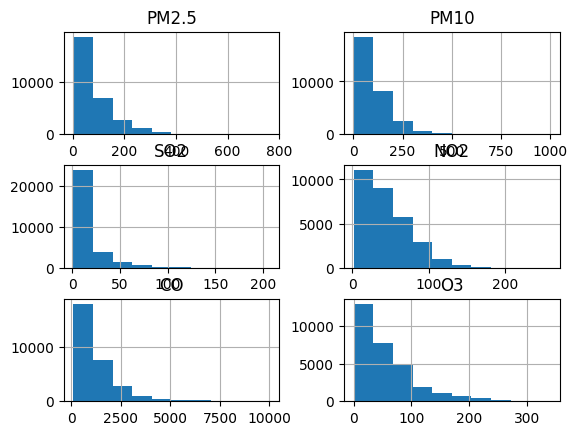

In [58]:
# Melihat histogram dari data
new_shunyi_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].hist()

Dari histogram diatas kita dapat melihat jika sebaran dari setiap data yang kita punya pada wilayah shunyi memiliki right skewed histogram, artinya rerata, dan modus lebih besar dari median.

**Explore** `new_wanshouxigong_df`

In [59]:
# Melihat pengaruh tekanan dan temperatur terhadap parameter CO, NO2 dan O3
new_wanshouxigong_df.groupby(by=["year"]).agg({
    "PRES": ["max", "min", "mean"],
    "TEMP": ["max", "min", "mean"],
    "CO": "mean",
    "NO2": "mean",
    "O3": "mean"
})

PRES                       TEMP                            CO  \
         max     min         mean   max   min       mean         mean   
year                                                                    
2013  1030.5   985.1  1007.205825  38.0 -10.1  15.855606  1406.269496   
2014  1037.0   987.7  1010.675951  40.6 -11.0  14.610894  1408.522796   
2015  1038.5   987.5  1012.454364  38.8  -9.7  13.484965  1359.109842   
2016  1042.0   989.7  1012.981879  37.3 -16.8  13.669360  1235.546367   
2017  1036.6  1002.1  1023.605676  15.9  -9.7   0.671848  1708.611327   

            NO2         O3  
           mean       mean  
year                        
2013  55.221690  53.598789  
2014  61.305799  57.287696  
2015  52.905367  58.550910  
2016  50.627407  57.022800  
2017  63.844065  34.366175

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>]],
      dtype=object)

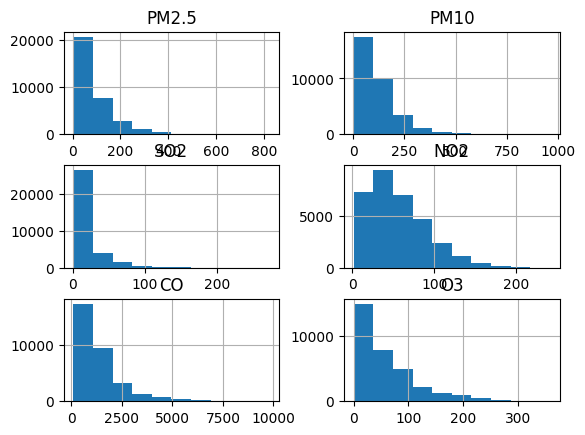

In [60]:
# Melihat histogram dari data
new_wanshouxigong_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].hist()

Sebaran data yang didapat pada wilayah Wanshouxigong adalah right skewed.

**Explore** `all_df`

In [61]:
# Membuat sebuah variabel untuk all data
all_df = pd.concat([new_aotizhongxin_df, new_guanyuan_df, new_shunyi_df, new_wanshouxigong_df], ignore_index=True)
all_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127035,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
127036,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
127037,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
127038,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


In [62]:
# Melihat rerata dari setiap parameter kualitas air terhadap tahun dan station
all_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "CO": "mean",
    "NO2": "mean",
    "O3": "mean"
})

PM2.5        PM10        SO2           CO        NO2  \
station       year                                                              
Aotizhongxin  2013   81.752918  112.373625  23.180283  1136.332944  62.713571   
              2014   90.201877  121.718791  21.334105  1186.813462  64.264719   
              2015   79.639229  109.548314  14.486997  1402.341097  60.391448   
              2016   73.894794   94.281883  10.814464  1196.857178  48.516806   
              2017   95.325616  108.040329  20.958178  1681.702763  66.328603   
Guanyuan      2013   83.067467  107.101548  20.828850  1154.563380  57.120506   
              2014   88.292366  116.161403  23.135310  1357.141118  63.853975   
              2015   82.519743  106.694346  14.098353  1317.383178  55.005829   
              2016   77.084510  105.176736  11.696024  1177.994065  53.916320   
              2017   93.163623  111.456621  21.264079  1406.468798  63.547945   
Shunyi        2013   78.597429   98.928202  16.762732  1248.537819  44.027594   
              2014   84.546379  110.994835  18.315027  1189.449779  46.588931   
              2015   80.527901   99.289145  10.713794  1181.678339  43.479315   
              2016   71.076625   86.734100  10.167383  1108.285991  43.634890   
              2017   92.013997  103.431571  20.601866  1707.542768  53.331260   
Wanshouxigong 2013   83.597009  111.103743  22.883741  1406.269496  55.221690   
              2014   87.970723  125.921362  21.926748  1408.522796  61.305799   
              2015   83.987719  110.538498  14.410484  1359.109842  52.905367   
              2016   78.224454   99.167513  10.663083  1235.546367  50.627407   
              2017  104.731575  119.342126  18.788208  1708.611327  63.844065   

                           O3  
station       year             
Aotizhongxin  2013  48.035401  
              2014  49.340435  
              2015  63.930616  
              2016  62.609028  
              2017  47.651979  
Guanyuan      2013  59.624137  
              2014  55.440947  
              2015  56.623201  
              2016  54.378279  
              2017  45.869863  
Shunyi        2013  53.195304  
              2014  56.896509  
              2015  54.071811  
              2016  58.772482  
              2017  43.635303  
Wanshouxigong 2013  53.598789  
              2014  57.287696  
              2015  58.550910  
              2016  57.022800  
              2017  34.366175

## **Visualization & Explanatory Analysis**

**Dari ke-empat data air yang digunakan tersebut, wilayah mana yang memiliki kualitas air tertinggi untuk bulan maret.**

In [63]:
all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
122502,30277,2016,8,13,12,30.0,48.0,2.0,55.0,600.0,25.0,28.9,1001.9,23.1,0.0,N,1.2,Wanshouxigong,2016-08-13 12:00:00
27467,30432,2016,8,19,23,32.0,32.0,2.0,26.0,900.0,116.0,26.7,1004.9,21.9,0.0,SW,1.5,Aotizhongxin,2016-08-19 23:00:00
50675,21129,2015,7,29,8,55.0,65.0,2.0,50.0,1000.0,30.0,27.2,997.2,23.7,0.0,NE,1.8,Guanyuan,2015-07-29 08:00:00
76063,14280,2014,10,16,23,78.0,158.0,4.0,92.0,800.0,2.0,8.1,1014.4,4.3,0.0,NNE,0.6,Shunyi,2014-10-16 23:00:00
25480,28312,2016,5,23,15,73.0,120.0,21.0,16.0,700.0,198.0,23.0,1003.2,11.7,0.0,WSW,4.8,Aotizhongxin,2016-05-23 15:00:00


In [64]:
# Melihat rerata dari setiap parameter kualitas air terhadap tahun dan station
march_df = all_df[all_df["month"] == 3]

result_df = march_df.groupby(by=["station", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "CO": "mean",
    "NO2": "mean",
    "O3": "mean"
})

result_df['Overall_Air_Quality'] = result_df.mean(axis=1)
result_df = result_df.sort_values(by='Overall_Air_Quality', ascending=False)
result_df

,,PM2.5,PM10,SO2,CO,NO2,O3,Overall_Air_Quality
station,month,,,,,,,
Aotizhongxin,3,100.613010,152.487026,31.999964,1380.082761,63.858656,47.572606,296.102337
Wanshouxigong,3,96.768563,143.039903,31.280708,1381.121443,60.862595,49.924705,293.832986
Guanyuan,3,94.605760,136.294136,31.122415,1334.072519,67.375052,48.066933,285.256136
Shunyi,3,97.735043,129.779339,25.524823,1261.246748,57.563211,48.316983,270.027691


In [65]:
# Mencari kualitas air tertinggi, yaitu ketika rerata partikel berbahayanya rendah
high_water_quality = result_df.sort_values(by="Overall_Air_Quality", ascending=True).head(1)
high_water_quality

,,PM2.5,PM10,SO2,CO,NO2,O3,Overall_Air_Quality
station,month,,,,,,,
Shunyi,3,97.735043,129.779339,25.524823,1261.246748,57.563211,48.316983,270.027691


In [66]:
print("Kualitas air tertinggi bulan maret adalah {} dengan rerata kandungan partikel berbahaya {} ".format(high_water_quality.index[0][0], high_water_quality["Overall_Air_Quality"][0]))

Kualitas air tertinggi bulan maret adalah Shunyi dengan rerata kandungan partikel berbahaya 270.02769106899547 


<ipython-input-67-f3b860cbd30b>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


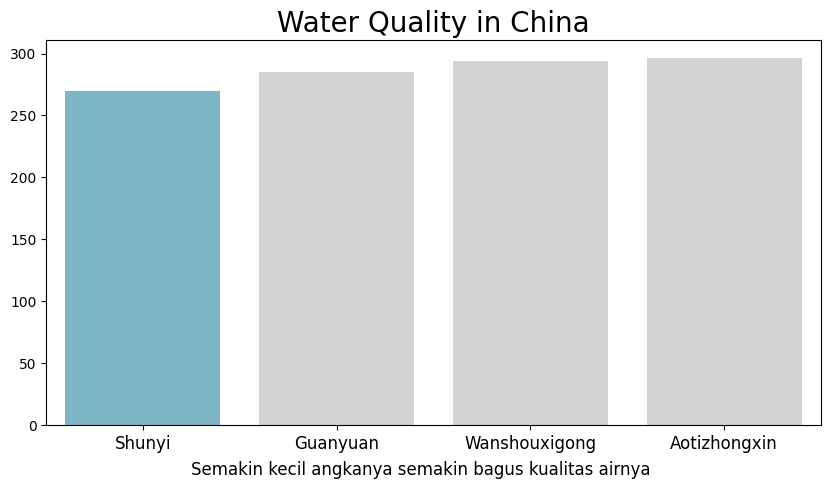

In [67]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y = "Overall_Air_Quality",
    x = "station",
    data = result_df.sort_values(by="Overall_Air_Quality", ascending=True),
    palette = colors,
    legend = False,
    hue = "station"
)

plt.title("Water Quality in China", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
txt = "Semakin kecil angkanya semakin bagus kualitas airnya"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12, linespacing=4)
plt.show()

**Bagaimana pengaruh curah hujan terhadap kualitas air berdasarkan data tersebut.**

In [68]:
all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
70886,8209,2014,2,6,0,162.0,149.0,42.0,59.0,2300.0,9.0,-4.0,1025.3,-10.6,0.0,NE,1.1,Shunyi,2014-02-06 00:00:00
82932,21682,2015,8,21,9,8.0,23.0,2.0,9.0,400.0,67.0,26.1,1003.7,13.9,0.0,N,2.4,Shunyi,2015-08-21 09:00:00
115799,23317,2015,10,28,12,3.0,6.0,2.0,6.0,200.0,61.0,13.3,1019.2,-6.9,0.0,NW,3.4,Wanshouxigong,2015-10-28 12:00:00
95898,1719,2013,5,11,14,29.0,27.0,4.0,9.0,200.0,88.0,33.8,986.7,-6.8,0.0,NW,3.5,Wanshouxigong,2013-05-11 14:00:00
125172,33054,2016,12,7,5,118.0,150.0,23.0,114.0,3200.0,3.0,-3.1,1018.9,-8.8,0.0,ENE,1.0,Wanshouxigong,2016-12-07 05:00:00


In [69]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,127040.000000,127040.00000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000,127040.000000
mean,17842.347883,2014.70418,6.448654,15.698953,11.610918,82.205082,107.490308,16.469270,54.345250,1273.200952,55.831099,13.522861,1012.191879,2.674457,0.063903,1.758332
std,10005.178049,1.15943,3.456311,8.804362,6.919044,81.987140,93.149398,22.671605,35.269101,1192.345829,56.736409,11.410526,10.400906,13.721054,0.816424,1.225675
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.100000,-36.000000,0.000000,0.000000
25%,9423.750000,2014.00000,3.000000,8.000000,6.000000,22.000000,37.000000,3.000000,27.000000,500.000000,8.000000,3.100000,1003.700000,-8.600000,0.000000,1.000000
50%,17991.000000,2015.00000,6.000000,16.000000,12.000000,58.000000,86.000000,7.000000,48.000000,900.000000,42.000000,14.400000,1011.700000,3.200000,0.000000,1.400000
75%,26370.000000,2016.00000,9.000000,23.000000,18.000000,114.000000,149.000000,20.000000,75.000000,1600.000000,81.000000,23.200000,1020.500000,15.200000,0.000000,2.300000
max,35064.000000,2017.00000,12.000000,31.000000,23.000000,823.000000,999.000000,293.000000,290.000000,10000.000000,423.000000,40.600000,1042.800000,28.500000,72.500000,13.200000


In [70]:
# Melihat rerata dari setiap parameter kualitas air terhadap hujan
all_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "CO": "mean",
    "NO2": "mean",
    "O3": "mean",
    "RAIN": ["min", "max", "mean"]
})

PM2.5        PM10        SO2           CO        NO2  \
                          mean        mean       mean         mean       mean   
station       year                                                              
Aotizhongxin  2013   81.752918  112.373625  23.180283  1136.332944  62.713571   
              2014   90.201877  121.718791  21.334105  1186.813462  64.264719   
              2015   79.639229  109.548314  14.486997  1402.341097  60.391448   
              2016   73.894794   94.281883  10.814464  1196.857178  48.516806   
              2017   95.325616  108.040329  20.958178  1681.702763  66.328603   
Guanyuan      2013   83.067467  107.101548  20.828850  1154.563380  57.120506   
              2014   88.292366  116.161403  23.135310  1357.141118  63.853975   
              2015   82.519743  106.694346  14.098353  1317.383178  55.005829   
              2016   77.084510  105.176736  11.696024  1177.994065  53.916320   
              2017   93.163623  111.456621  21.264079  1406.468798  63.547945   
Shunyi        2013   78.597429   98.928202  16.762732  1248.537819  44.027594   
              2014   84.546379  110.994835  18.315027  1189.449779  46.588931   
              2015   80.527901   99.289145  10.713794  1181.678339  43.479315   
              2016   71.076625   86.734100  10.167383  1108.285991  43.634890   
              2017   92.013997  103.431571  20.601866  1707.542768  53.331260   
Wanshouxigong 2013   83.597009  111.103743  22.883741  1406.269496  55.221690   
              2014   87.970723  125.921362  21.926748  1408.522796  61.305799   
              2015   83.987719  110.538498  14.410484  1359.109842  52.905367   
              2016   78.224454   99.167513  10.663083  1235.546367  50.627407   
              2017  104.731575  119.342126  18.788208  1708.611327  63.844065   

                           O3 RAIN                  
                         mean  min   max      mean  
station       year                                  
Aotizhongxin  2013  48.035401  0.0  21.0  0.069840  
              2014  49.340435  0.0  40.7  0.061016  
              2015  63.930616  0.0  36.6  0.069226  
              2016  62.609028  0.0  46.4  0.083716  
              2017  47.651979  0.0   0.8  0.002763  
Guanyuan      2013  59.624137  0.0  72.5  0.090315  
              2014  55.440947  0.0  26.8  0.049872  
              2015  56.623201  0.0  36.6  0.073189  
              2016  54.378279  0.0  46.4  0.080736  
              2017  45.869863  0.0   0.8  0.001979  
Shunyi        2013  53.195304  0.0  31.2  0.041576  
              2014  56.896509  0.0  37.3  0.042344  
              2015  54.071811  0.0  30.9  0.079677  
              2016  58.772482  0.0  19.5  0.062228  
              2017  43.635303  0.0   1.1  0.002877  
Wanshouxigong 2013  53.598789  0.0  23.8  0.059521  
              2014  57.287696  0.0  22.4  0.050517  
              2015  58.550910  0.0  36.6  0.069356  
              2016  57.022800  0.0  46.4  0.078169  
              2017  34.366175  0.0   0.8  0.002870

In [71]:
# Melihat rerata dari setiap parameter kualitas air terhadap hujan
result_df = all_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "CO": "mean",
    "NO2": "mean",
    "O3": "mean",
    "RAIN": ["min", "max", "mean"]
})

result_df['Overall_Air_Quality'] = result_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean(axis=1)
result_df = result_df.sort_values(by='Overall_Air_Quality', ascending=True)
result_df

PM2.5        PM10        SO2           CO        NO2  \
                          mean        mean       mean         mean       mean   
station       year                                                              
Shunyi        2016   71.076625   86.734100  10.167383  1108.285991  43.634890   
Aotizhongxin  2013   81.752918  112.373625  23.180283  1136.332944  62.713571   
Shunyi        2015   80.527901   99.289145  10.713794  1181.678339  43.479315   
Guanyuan      2016   77.084510  105.176736  11.696024  1177.994065  53.916320   
              2013   83.067467  107.101548  20.828850  1154.563380  57.120506   
Aotizhongxin  2016   73.894794   94.281883  10.814464  1196.857178  48.516806   
Shunyi        2014   84.546379  110.994835  18.315027  1189.449779  46.588931   
Wanshouxigong 2016   78.224454   99.167513  10.663083  1235.546367  50.627407   
Aotizhongxin  2014   90.201877  121.718791  21.334105  1186.813462  64.264719   
Shunyi        2013   78.597429   98.928202  16.762732  1248.537819  44.027594   
Guanyuan      2015   82.519743  106.694346  14.098353  1317.383178  55.005829   
Wanshouxigong 2015   83.987719  110.538498  14.410484  1359.109842  52.905367   
Guanyuan      2014   88.292366  116.161403  23.135310  1357.141118  63.853975   
Aotizhongxin  2015   79.639229  109.548314  14.486997  1402.341097  60.391448   
Wanshouxigong 2013   83.597009  111.103743  22.883741  1406.269496  55.221690   
Guanyuan      2017   93.163623  111.456621  21.264079  1406.468798  63.547945   
Wanshouxigong 2014   87.970723  125.921362  21.926748  1408.522796  61.305799   
Aotizhongxin  2017   95.325616  108.040329  20.958178  1681.702763  66.328603   
Shunyi        2017   92.013997  103.431571  20.601866  1707.542768  53.331260   
Wanshouxigong 2017  104.731575  119.342126  18.788208  1708.611327  63.844065   

                           O3 RAIN                 Overall_Air_Quality  
                         mean  min   max      mean                      
station       year                                                      
Shunyi        2016  58.772482  0.0  19.5  0.062228          229.778578  
Aotizhongxin  2013  48.035401  0.0  21.0  0.069840          244.064790  
Shunyi        2015  54.071811  0.0  30.9  0.079677          244.960051  
Guanyuan      2016  54.378279  0.0  46.4  0.080736          246.707656  
              2013  59.624137  0.0  72.5  0.090315          247.050981  
Aotizhongxin  2016  62.609028  0.0  46.4  0.083716          247.829026  
Shunyi        2014  56.896509  0.0  37.3  0.042344          251.131910  
Wanshouxigong 2016  57.022800  0.0  46.4  0.078169          255.208604  
Aotizhongxin  2014  49.340435  0.0  40.7  0.061016          255.612232  
Shunyi        2013  53.195304  0.0  31.2  0.041576          256.674847  
Guanyuan      2015  56.623201  0.0  36.6  0.073189          272.054108  
Wanshouxigong 2015  58.550910  0.0  36.6  0.069356          279.917137  
Guanyuan      2014  55.440947  0.0  26.8  0.049872          284.004186  
Aotizhongxin  2015  63.930616  0.0  36.6  0.069226          288.389617  
Wanshouxigong 2013  53.598789  0.0  23.8  0.059521          288.779078  
Guanyuan      2017  45.869863  0.0   0.8  0.001979          290.295155  
Wanshouxigong 2014  57.287696  0.0  22.4  0.050517          293.822521  
Aotizhongxin  2017  47.651979  0.0   0.8  0.002763          336.667911  
Shunyi        2017  43.635303  0.0   1.1  0.002877          336.759461  
Wanshouxigong 2017  34.366175  0.0   0.8  0.002870          341.613913

In [72]:
# Melihat korelasi antar data
result_df.corr()

PM2.5      PM10       SO2        CO       NO2  \
                              mean      mean      mean      mean      mean   
PM2.5               mean  1.000000  0.689016  0.644365  0.780445  0.690466   
PM10                mean  0.689016  1.000000  0.723381  0.348793  0.764853   
SO2                 mean  0.644365  0.723381  1.000000  0.386048  0.694266   
CO                  mean  0.780445  0.348793  0.386048  1.000000  0.480328   
NO2                 mean  0.690466  0.764853  0.694266  0.480328  1.000000   
O3                  mean -0.797192 -0.350346 -0.455135 -0.605693 -0.427187   
RAIN                min        NaN       NaN       NaN       NaN       NaN   
                    max  -0.607145 -0.177029 -0.355200 -0.714612 -0.326684   
                    mean -0.780125 -0.279079 -0.483911 -0.795258 -0.382393   
Overall_Air_Quality       0.820258  0.436674  0.457203  0.994801  0.555030   

                                O3 RAIN                      \
                              mean  min       max      mean   
PM2.5               mean -0.797192  NaN -0.607145 -0.780125   
PM10                mean -0.350346  NaN -0.177029 -0.279079   
SO2                 mean -0.455135  NaN -0.355200 -0.483911   
CO                  mean -0.605693  NaN -0.714612 -0.795258   
NO2                 mean -0.427187  NaN -0.326684 -0.382393   
O3                  mean  1.000000  NaN  0.716818  0.758360   
RAIN                min        NaN  NaN       NaN       NaN   
                    max   0.716818  NaN  1.000000  0.864465   
                    mean  0.758360  NaN  0.864465  1.000000   
Overall_Air_Quality      -0.610130  NaN -0.700729 -0.792031   

                         Overall_Air_Quality  
                                              
PM2.5               mean            0.820258  
PM10                mean            0.436674  
SO2                 mean            0.457203  
CO                  mean            0.994801  
NO2                 mean            0.555030  
O3                  mean           -0.610130  
RAIN                min                  NaN  
                    max            -0.700729  
                    mean           -0.792031  
Overall_Air_Quality                 1.000000

In [73]:
print(result_df.columns)

MultiIndex([(              'PM2.5', 'mean'),
            (               'PM10', 'mean'),
            (                'SO2', 'mean'),
            (                 'CO', 'mean'),
            (                'NO2', 'mean'),
            (                 'O3', 'mean'),
            (               'RAIN',  'min'),
            (               'RAIN',  'max'),
            (               'RAIN', 'mean'),
            ('Overall_Air_Quality',     '')],
           )


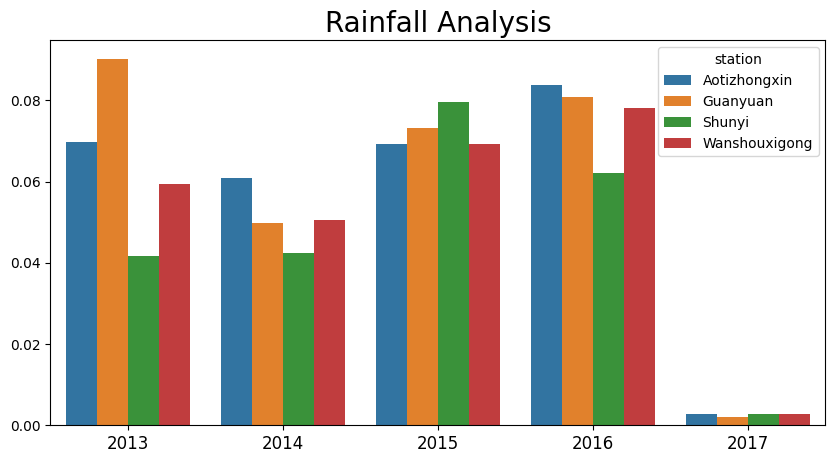

In [74]:
# Visualisasi data analisis hujan
plt.figure(figsize=(10, 5))

rain_mean = result_df[('RAIN', 'mean')]

sns.barplot(
    y = rain_mean,
    x = "year",
    data = result_df,
    legend = True,
    hue = "station"
)

plt.title('Rainfall Analysis', fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

##**Conclusion**
* Berdasarkan eksplorasi dan visualisasi data diatas dapat disimpulkan jika kota Shunyi memiliki rerata kualitas air yang baik, hal ini ditandai dengan daerah yang paling sedikit partikel membahayakan yang ada pada daerah tersebut.
* Berdasarkan eksploarsi untuk pertanyaan 2, terlihat jika memang hujan tidak terlalu berpengaruh terhadap kualitas air pada daerah tersebut. Hal ini dapat dilihat pada korelasi hujan terhadap parameter kandungan partikel berbahaya yang ternyata hasilnya sangat kecil dan berarti memang tidak berpengaruh banyak terhadap kualitas air.

**Analisis Lanjutan (Timeseries Analysis)**

Alasannya adalah : dataset ini bukanlah data penjualan yang bisa dianalisis dengan RFM analysis, menggunakan geoanalysis juga tidak dapat dilakukan karena tidak terdapat data wilayah spesifik seperti dimensi, peta, long, dan alt. Teknik ini digunakan untuk melihat perubahan parameter tertentu terhadap satuan waktu.



In [75]:
# Melihat rerata dari setiap parameter kualitas air
all_df['Overall_Air_Quality'] = all_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean(axis=1)
all_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Overall_Air_Quality
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,66.000000
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,67.333333
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,67.000000
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,67.666667
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127035,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00,90.333333
127036,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00,106.500000
127037,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00,106.333333
127038,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00,88.000000


In [76]:
# Mengubah kolom datetime menjadi bentuk pandas datetime
all_df['datetime'] = pd.to_datetime(all_df['datetime'])

In [77]:
# Mengatur index terhadap datetime
all_df.set_index('datetime', inplace=True)
all_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Overall_Air_Quality
datetime,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,66.000000
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,67.333333
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,67.000000
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,67.666667
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,90.333333
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,106.500000
2017-02-28 21:00:00,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,106.333333


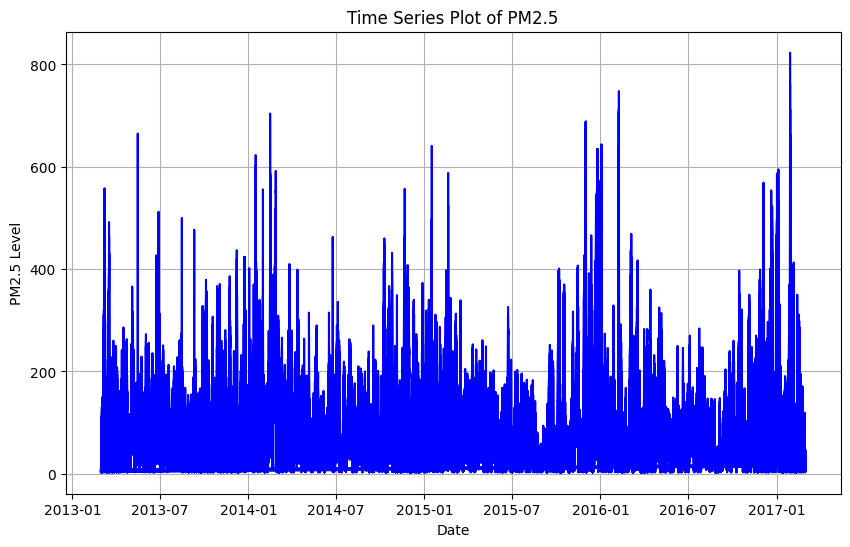

In [78]:
# Menampilkan plot time series untuk PM2.5
plt.figure(figsize=(10, 6))
plt.plot(all_df['PM2.5'], color='blue')
plt.title('Time Series Plot of PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.show()

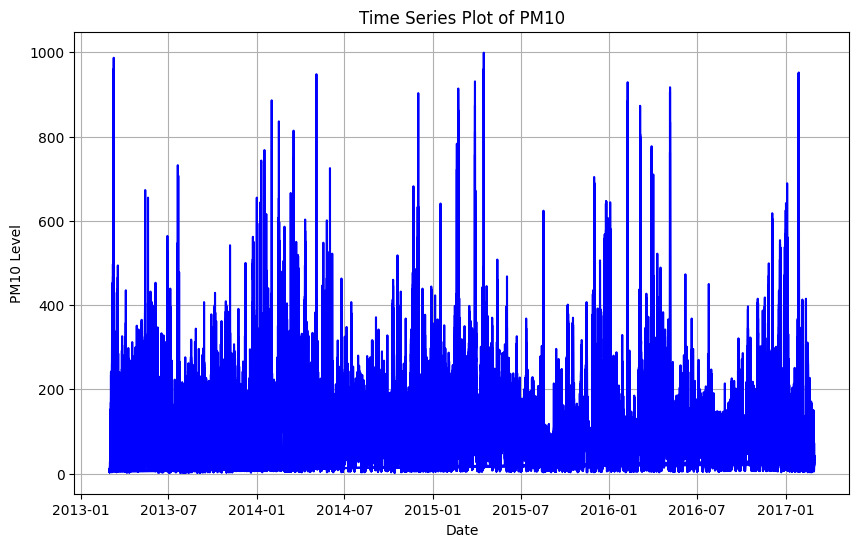

In [79]:
# Menampilkan plot time series untuk PM10
plt.figure(figsize=(10, 6))
plt.plot(all_df['PM10'], color='blue')
plt.title('Time Series Plot of PM10')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.grid(True)
plt.show()

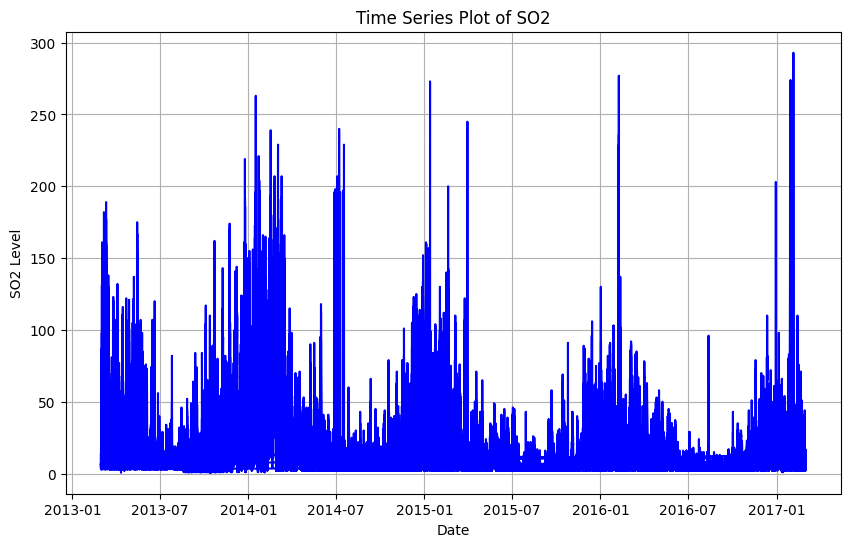

In [80]:
# Menampilkan plot time series untuk SO2
plt.figure(figsize=(10, 6))
plt.plot(all_df['SO2'], color='blue')
plt.title('Time Series Plot of SO2')
plt.xlabel('Date')
plt.ylabel('SO2 Level')
plt.grid(True)
plt.show()